# Project: Wrangle and Analyze WeRateDogsData

Some keypoints taken from "Project Motivation":
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.

In [173]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
from IPython.display import Image

#Sample image from WeRateDogs
Image(url = 'https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg',width=300)

## Gathering Data

As per instructed, we should gather data from 3 different sources using 3 different methods.

In [174]:
# Source 1: instructor-provided csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Source 2: tsv from instructor-provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [175]:
# Source 3: directly from twitter using tweepy
# reference: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True) #parameters set per instruction

tweet_ids = twitter_archive['tweet_id'].values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [26]:
missing_tweets = []
#(runtime: ~20 minutes)
with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Missing tweet: ' + str(tweet_id))
            missing_tweets.append(tweet_id)

Missing tweet: 888202515573088257
Missing tweet: 873697596434513921
Missing tweet: 872668790621863937
Missing tweet: 872261713294495745
Missing tweet: 869988702071779329
Missing tweet: 866816280283807744
Missing tweet: 861769973181624320
Missing tweet: 856602993587888130
Missing tweet: 851953902622658560
Missing tweet: 845459076796616705
Missing tweet: 844704788403113984
Missing tweet: 842892208864923648
Missing tweet: 837366284874571778
Missing tweet: 837012587749474308
Missing tweet: 829374341691346946
Missing tweet: 827228250799742977
Missing tweet: 812747805718642688
Missing tweet: 802247111496568832
Missing tweet: 779123168116150273
Missing tweet: 775096608509886464
Missing tweet: 770743923962707968
Rate limit reached. Sleeping for: 725
Missing tweet: 754011816964026368
Missing tweet: 680055455951884288
Rate limit reached. Sleeping for: 726


In [28]:
#back up the missing_tweets list in a .txt file
with open('missing_tweets.txt', 'w') as filehandle:
    for listitem in missing_tweets:
        filehandle.write('%s\n' % listitem)

In [176]:
# reading missing_tweets.txt
missing_tweets = []

# open file and read the content in a list
with open('missing_tweets.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentTweet = line[:-1]

        # add item to the list
        missing_tweets.append(currentTweet)

In [177]:
tweet_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:   
        tweet_dict = {}
        data = json.loads(line)        
        try:
            tweet_dict['tweet_id'] = data['id']  #data['extended_entities']['media'][0]['id']
        except:
            tweet_dict['tweet_id'] = 'Error'

        tweet_dict['retweet_count'] = data['retweet_count']
        tweet_dict['favorite_count'] = data['favorite_count']
        
        tweet_list.append(tweet_dict)

tweets = pd.DataFrame(tweet_list)

# Assessing Data

Now we need to assess data *visually* and *programmatically* for quality and tidiness.

In [178]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [179]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [180]:
twitter_archive['rating_numerator'].value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [181]:
twitter_archive['rating_denominator'].value_counts() 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [182]:
twitter_archive['name'].value_counts() 

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Daisy          7
Bailey         7
Buddy          7
Toby           7
Milo           6
Dave           6
Rusty          6
Jack           6
Koda           6
Bella          6
Oscar          6
Jax            6
Stanley        6
Leo            6
Scout          6
Sunny          5
            ... 
Stuart         1
Mairi          1
Andy           1
Jangle         1
Banjo          1
Ashleigh       1
Dietrich       1
Lugan          1
Mimosa         1
Pawnd          1
Fwed           1
Charleson      1
Brooks         1
Monkey         1
Blanket        1
Chevy          1
Mauve          1
Petrick        1
Aiden          1
Burt           1
Darby          1
Brutus         1
Daniel         1
Trevith        1
Bradley        1
Iroh           1
Wesley         1
Travis        

Want to also quickly look at on Twitter:
- tweets from different sources differ;
- reply tweets
- retweets

We can do that by extracting the tweet_id, and check the tweet on browser.

In [183]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [184]:
# the Vine source
twitter_archive[twitter_archive['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None


In [185]:
twitter_archive[twitter_archive['retweeted_status_id'].notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None


In [186]:
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None


In [187]:
tweets

,favorite_count,retweet_count,tweet_id
0,36907,7860,892420643555336193
1,31759,5834,892177421306343426
2,23924,3853,891815181378084864
3,40218,8035,891689557279858688
4,38417,8684,891327558926688256
5,19331,2894,891087950875897856
6,11259,1906,890971913173991426
7,62230,17565,890729181411237888
8,26599,3988,890609185150312448
9,30440,6834,890240255349198849


In [188]:
tweets['tweet_id'].value_counts() #No repeated tweet_id. Great!

749075273010798592    1
743545585370791937    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
833722901757046785    1
805487436403003392    1
759923798737051648    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
818259473185828864    1
842765311967449089    1
809920764300447744    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [189]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
tweet_id          2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [190]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [191]:
image_predictions['p1'].value_counts() 

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [192]:
image_predictions['tweet_id'].value_counts() #No repeated tweet_id. Great!

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [193]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


After visually and programmatically examining the data, we see that there are a plethora of things that could be "fixed". As the analysis following the cleaning would focus on (i) the classification results of breeds, (ii) the ratings and popularity (i.e. retweet & favorite counts) of different breeds and (iii) popular phrases used to refer to the dogs, I focus my cleaning effort on providing valid data for these analysis. 


### Tidiness Issues
1. Retweets in "twitter_archive". These entries should be deleted.
2. Replies in "twitter_archive". These entries should be deleted.

### Quality Issues
"twitter_archive":
1. Multiple entries with non-10 denominators for rating
2. Multiple entries with abnormally high numerators for rating
3. Multiple entries with abnormally low numerators for rating
4. 'Source' column difficult to read
5. Entries in the name columns that are not names ("the", "an")
6. Some tweets are no longer on Twitter 
7. Some 'expanded_urls' entries are incorrect

"image_predictions":
8. Entries in 'p1', 'p2', 'p3' have different formats

# Cleaning Data

Let's first create 3 new dataframes to work on.

In [194]:
df_archive = twitter_archive.copy()
df_predictions = image_predictions.copy()
df_tweets = tweets.copy()

### Tidiness Issues
1. Retweets in "twitter_archive". These entries should be deleted.

In [195]:
# Taking out the retweet rows
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]
# Test:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

2. Replies in "twitter_archive". These entries should be deleted.

In [196]:
# Taking out the reply rows
df_archive = df_archive[df_archive['in_reply_to_user_id'].isnull()]
# Test:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Quality Issues
"twitter_archive":
1. Multiple entries with non-10 denominators for rating

In [197]:
df_archive[df_archive['rating_denominator'] !=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [198]:
# It's worth looking at these tweets 
temp_list = df_archive[df_archive['rating_denominator'] !=10]['tweet_id']

url = 'https://twitter.com/dog_rates/status/'
for t_id in temp_list:
    print(url+str(t_id))

https://twitter.com/dog_rates/status/820690176645140481
https://twitter.com/dog_rates/status/810984652412424192
https://twitter.com/dog_rates/status/758467244762497024
https://twitter.com/dog_rates/status/740373189193256964
https://twitter.com/dog_rates/status/731156023742988288
https://twitter.com/dog_rates/status/722974582966214656
https://twitter.com/dog_rates/status/716439118184652801
https://twitter.com/dog_rates/status/713900603437621249
https://twitter.com/dog_rates/status/710658690886586372
https://twitter.com/dog_rates/status/709198395643068416
https://twitter.com/dog_rates/status/704054845121142784
https://twitter.com/dog_rates/status/697463031882764288
https://twitter.com/dog_rates/status/684222868335505415
https://twitter.com/dog_rates/status/682962037429899265
https://twitter.com/dog_rates/status/677716515794329600
https://twitter.com/dog_rates/status/675853064436391936
https://twitter.com/dog_rates/status/666287406224695296


We see that in the case of non-10 denominators, it's one of the four situations: (i) a group of dogs, (ii) another fraction-like number in tweet, (iii) special date (4/20), (iv) special cause (donation). In a more precise analysis, we can salvage some of these rows by hand (e.g take averages of the group dog score). But small proportion of these outliners, in this project, we will simply remove these rows from consideration. 

In [199]:
df_archive = df_archive[df_archive['rating_denominator'] ==10]
#Test:
df_archive['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

2. Multiple entries with abnormally high numerators for rating

In [200]:
df_archive['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [201]:
# We can isolate and examine these rows with greater-than-20 values
df_archive[df_archive['rating_numerator'] >20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [202]:
# It's worth looking at these tweets 
temp_list = df_archive[df_archive['rating_numerator'] >20]['tweet_id']

url = 'https://twitter.com/dog_rates/status/'
for t_id in temp_list:
    print(url+str(t_id))

https://twitter.com/dog_rates/status/786709082849828864
https://twitter.com/dog_rates/status/778027034220126208
https://twitter.com/dog_rates/status/749981277374128128
https://twitter.com/dog_rates/status/680494726643068929
https://twitter.com/dog_rates/status/670842764863651840


In [203]:
# We will remove these 4 rows w/ fraction scores (and one row w/ Snoop Dogg) from consideration
df_archive = df_archive[df_archive['rating_numerator'] <20]
# Test:
df_archive.query('rating_numerator >20').shape[0]

0

3. Multiple entries with abnormally low numerators for rating

In [204]:
# We can isolate and examine these rows with lower-than-3 values
df_archive[df_archive['rating_numerator'] <3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,None,None,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None


In [205]:
# It's worth looking at these tweets 
temp_list = df_archive[df_archive['rating_numerator'] <3]['tweet_id']

url = 'https://twitter.com/dog_rates/status/'
for t_id in temp_list:
    print(url+str(t_id))

https://twitter.com/dog_rates/status/835152434251116546
https://twitter.com/dog_rates/status/678675843183484930
https://twitter.com/dog_rates/status/678424312106393600
https://twitter.com/dog_rates/status/675153376133427200
https://twitter.com/dog_rates/status/674265582246694913
https://twitter.com/dog_rates/status/670826280409919488
https://twitter.com/dog_rates/status/670783437142401025
https://twitter.com/dog_rates/status/668142349051129856
https://twitter.com/dog_rates/status/667878741721415682
https://twitter.com/dog_rates/status/667549055577362432
https://twitter.com/dog_rates/status/666786068205871104
https://twitter.com/dog_rates/status/666411507551481857
https://twitter.com/dog_rates/status/666104133288665088
https://twitter.com/dog_rates/status/666051853826850816


In [206]:
# While some of these are dogs, the majority of these rates a different animal. 
# We will remove these rows from consideration.
df_archive = df_archive[df_archive['rating_numerator'] >2]
# Test:
df_archive.query('rating_numerator <3').shape[0]

0

4. 'Source' column difficult to read

In [207]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1930
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [208]:
# Replace these with something easier to read
old_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
new_list = ['Twitter for iPhone',
            'Vine',
            'Twitter Web Client',
            'TweetDeck']

for old, new in zip(old_list, new_list):
    df_archive['source'] = df_archive['source'].str.replace(old,new)

In [209]:
# Test:
df_archive.source.value_counts()

Twitter for iPhone    1930
Vine                    91
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

5. Entries in the name columns that are not names ("the", "an")

In [210]:
# We notice that every 'name' entry that start with a lower letter appears to not be an actual name
non_names = df_archive[~df_archive['name'].str[0].str.isupper()]['name'].unique()
non_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [211]:
# We can replace these non-names with 'None'
df_archive.loc[df_archive.name.isin(non_names), 'name'] = None

In [212]:
# Test: if every name ('None' included) now starts with a upper case
df_archive['name'].str[0].str.isupper().mean()

1.0

6. Some tweets are no longer on Twitter 

In [213]:
# A list of missing tweets was compiled when accessing the tweets using Tweepy
df_archive[df_archive.tweet_id.isin(missing_tweets)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,Twitter for iPhone,This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,Twitter for iPhone,This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,Twitter for iPhone,This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,None,None,None,None
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,Twitter for iPhone,This is Astrid. She's a guide doggo in trainin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
750,779123168116150273,NaN,NaN,2016-09-23 01:00:13 +0000,Twitter for iPhone,This is Reggie. He hugs everyone he meets. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779123168...,12,10,Reggie,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,Twitter for iPhone,This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


In [214]:
# It's worth checking the tweets on this list
temp_list = df_archive[df_archive.tweet_id.isin(missing_tweets)]['tweet_id']

url = 'https://twitter.com/dog_rates/status/'
for t_id in temp_list:
    print(url+str(t_id))

https://twitter.com/dog_rates/status/872261713294495745
https://twitter.com/dog_rates/status/844704788403113984
https://twitter.com/dog_rates/status/837366284874571778
https://twitter.com/dog_rates/status/829374341691346946
https://twitter.com/dog_rates/status/779123168116150273
https://twitter.com/dog_rates/status/754011816964026368
https://twitter.com/dog_rates/status/680055455951884288


In [215]:
# We need to remove these tweets 
df_archive = df_archive[~df_archive.tweet_id.isin(missing_tweets)]
# Test: 
df_archive[df_archive.tweet_id.isin(missing_tweets)].shape[0]

0

7. Some 'expanded_urls' entries are incorrect

In [216]:
# We can drop all the expanded_urls and replace them with urls of standrad format
# e.g. : https://twitter.com/dog_rates/status/855860136149123072 
df_archive = df_archive.drop(columns = 'expanded_urls')
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14,10,Cassie,doggo,None,None,None


In [217]:
df_archive['expanded_urls'] = url + df_archive['tweet_id'].apply(str)
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None,https://twitter.com/dog_rates/status/891327558...
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,10,None,None,None,None,None,https://twitter.com/dog_rates/status/891087950...
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,10,Jax,None,None,None,None,https://twitter.com/dog_rates/status/890971913...
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,13,10,None,None,None,None,None,https://twitter.com/dog_rates/status/890729181...
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13,10,Zoey,None,None,None,None,https://twitter.com/dog_rates/status/890609185...
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14,10,Cassie,doggo,None,None,None,https://twitter.com/dog_rates/status/890240255...


"image_predictions":
8. Entries in 'p1', 'p2', 'p3' have different formats

In [218]:
# Spelling in different formats (e.g. "_", space, upper case, lower case)
#
# While dog breed capitalization is a more complex topic, 
# (reference: https://style.mla.org/capitalizing-names-of-dog-breeds/)
# for this project we will replace "_" with space and capitalize each word for uniformity and visual comfort

df_predictions[['p1','p2', 'p3']].head(10)

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [219]:
for p in ['p1','p2','p3']:
    df_predictions[p] = df_predictions[p].str.replace('_',' ')
    df_predictions[p] = df_predictions[p].str.title()
    
df_predictions[['p1','p2', 'p3']].head(10)

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Additional tidiness work
As mentioned previously, the analysis following the cleaning would focus on (i) the classification results of breeds, (ii) the ratings and popularity (i.e. retweet & favorite counts) of different breeds and (iii) popular phrases used to refer to the dogs.

For (i) and (ii), the prediction-related columns can be condensed into one colomn "most_likely_breed", and the rating data from "twitter_archive", prediction data from "image_predictions" and popularity data from "twitter" can be concatenated into one new dataframe.

In [243]:
# I will create a new dataframe for (i) and (ii) with only the essential information
df_breed = df_predictions.copy()
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [244]:
# Here we implement some logic to find the most likely dog breed prediction
df_breed['p1_product'] = df_breed['p1_conf']*df_breed['p1_dog']
df_breed['p2_product'] = df_breed['p2_conf']*df_breed['p2_dog']
df_breed['p3_product'] = df_breed['p3_conf']*df_breed['p3_dog']
most_likely_breed = []

for index, row in df_breed.iterrows():
    product_list = [row['p1_product'],row['p2_product'],row['p3_product']]
    if max(product_list) == 0:
        most_likely_breed.append(None)
    elif max(product_list) == row['p1_product']:
        most_likely_breed.append(row['p1'])
    elif max(product_list) ==  row['p2_product']:
        most_likely_breed.append(row['p2'])
    else:
        most_likely_breed.append(row['p3'])
        
df_breed['most_likely_breed'] = most_likely_breed
df_breed.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_product,p2_product,p3_product,most_likely_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,0.465074,0.156665,0.061428,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,0.506826,0.074192,0.072010,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,0.596461,0.138584,0.116197,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,0.408143,0.360687,0.222752,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,0.243682,0.154629,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,0.651137,0.263788,0.016199,Bernese Mountain Dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,0.000000,0.000000,0.000000,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,0.692517,0.058279,0.000000,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,0.000000,0.000000,0.007959,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,0.201493,0.192305,0.082086,Miniature Poodle


In [245]:
# Here we drop the unneeded columns for later analysis
not_needed_columns = ['img_num','p1','p1_conf','p1_dog','p1_product','p2','p2_conf','p2_dog','p2_product','p3','p3_conf','p3_dog','p3_product']
df_breed = df_breed.drop(columns = not_needed_columns)
# Then we drop the not-recognized breed
df_breed = df_breed[~df_breed['most_likely_breed'].isnull()]
df_breed

,tweet_id,jpg_url,most_likely_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden Retriever


# Analysis

The analysis of the data will provide 3 insights, judging from the provided data:

**1. Which are the top 5 breeds mostly frequently featured on WeRateDogs?**

In [273]:
y = df_breed['most_likely_breed'].value_counts().nlargest(5)
y

Golden Retriever      153
Labrador Retriever    101
Pembroke               94
Chihuahua              89
Pug                    62
Name: most_likely_breed, dtype: int64

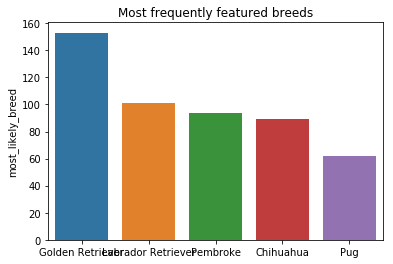

In [274]:
import seaborn
seaborn.barplot(x=y.index, y=y).set_title("Most frequently featured breeds");

**2. How do these 5 breeds rank up in popularities judging from ratings, favorite counts, and retweet counts?**

In [264]:
# For this analysis we merge df_breed with the rating data from df_archive and the popularity data from df_tweets
df_archive_dummy = df_archive[['tweet_id','rating_numerator']].copy()
df_breed = df_breed.merge(df_archive_dummy, on = 'tweet_id').merge(df_tweets, on = 'tweet_id')
df_breed.head()

,tweet_id,jpg_url,most_likely_breed,rating_numerator,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,8,2466,474
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,7,121,44
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,9,118,43
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,6,279,134
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,5,99,41


In [279]:
top5_list = y.index.tolist()
rating_mean_list = []
favorite_mean_list = []
retweet_mean_list = []

for breed in top5_list:
    rating_mean_list.append(df_breed[df_breed['most_likely_breed'] == breed]['rating_numerator'].mean())
    favorite_mean_list.append(round(df_breed[df_breed['most_likely_breed'] == breed]['favorite_count'].mean()))
    retweet_mean_list.append(round(df_breed[df_breed['most_likely_breed'] == breed]['retweet_count'].mean()))

[11.555555555555555, 11.168316831683168, 11.425531914893616, 10.539325842696629, 10.241935483870968]


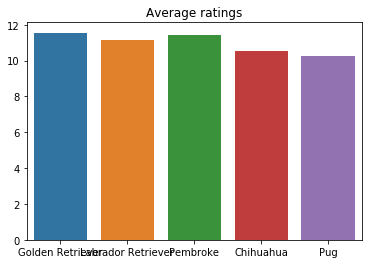

In [280]:
seaborn.barplot(x=y.index, y=rating_mean_list).set_title("Average ratings");
print(rating_mean_list)

In terms of rating, the 5 breeds are quite similar. Ratings, however, only reflect the opinion of the WeRateDogs editors, and it appears that they are quite generous.

[11737.0, 11212.0, 10504.0, 7803.0, 5755.0]


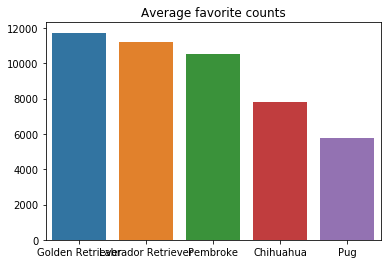

In [281]:
seaborn.barplot(x=y.index, y=favorite_mean_list).set_title("Average favorite counts");
print(favorite_mean_list)

[3377.0, 3463.0, 2808.0, 2457.0, 1706.0]


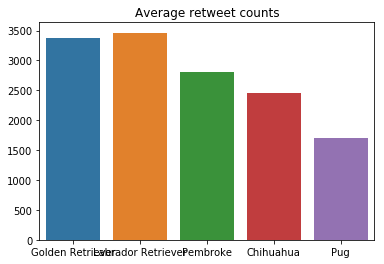

In [282]:
seaborn.barplot(x=y.index, y=retweet_mean_list).set_title("Average retweet counts");
print(retweet_mean_list)

When we look at average favorites and retweets, we can see that Golden Retrievers and Labrador Retrievers are clear winners.

**3. What is the most popular phrase to refer to a dog on WeRateDogs?**

[82, 10, 229, 24]


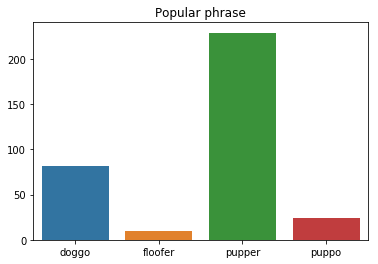

In [285]:
dogtionary = ['doggo','floofer','pupper','puppo']
popular_phrase = []

for phrase in dogtionary: 
    popular_phrase.append(df_archive[df_archive[phrase] == phrase].shape[0])
    
seaborn.barplot(x=dogtionary, y=popular_phrase).set_title("Popular phrase");
print(popular_phrase)

'Pupper' is the obvious winner as the most frequently used phrase to refer to a dog on WeRateDogs.

## Saving Dataframes

For future reference, we should save the 3 cleaned master dataframes ('df_archive', 'df_tweets', 'df_predictions') and the 1 compact dataframe ('df_breed') used for analysis.

In [286]:
df_archive.to_csv('df_archive.csv')
df_tweets.to_csv('df_tweets.csv')
df_predictions.to_csv('df_predictions.csv')
df_breed.to_csv('df_breed.csv')